<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3
import pandas as pd
import requests
from bs4 import BeautifulSoup
import html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 69.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.1.1
    Uninstalling charset-normalizer-2.1.1:
      Successfully uninstalled charset-normalizer-2.1.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-cos-sdk-core 2.12.0 requires requests<3.0,>=2.27.1, but you have requests 2.26.0 which is incompatible.

                  __    __    

Download the webpage at the url


In [4]:
#your code goes here
data  = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [16]:
#your code goes here
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>
# Get all rows from the table
def get_data(table): #define function get_data
    language_salary_list = []
    for row in table.find_all('tr'):  # in html table row is represented by the tag <tr>
# Get all columns in each row.
        cols=row.find_all('td') # in html a column is represented by the tag <td>
        language_name = cols[1].getText() # store the value in column 2 as language_name
        annual_average_salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    #     print("{}:{}".format(language_name, annual_average_salary))
        language_salary_list.append([language_name, annual_average_salary]) #append our stored values to list
    language_salary_list.remove(['Language', 'Average Annual Salary']) #remove duplicate colume headers from list
    return language_salary_list

data=get_data(table) #store/assign function get_data to variable data
data #call variable

[['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

Save the scrapped data into a file named *popular-languages.csv*


In [42]:
# We will save scraped data to CSV file at the end. First let's convert to dataframe and add column headers
ProgLangSal_df = pd.DataFrame(data, columns=["Language", "Average Annual Salary"])
ProgLangSal_df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [20]:
# use the Magic % and inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # for ggplot-like style: optional

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


In [63]:
#First- clean data and set index to Language
ProgLangSal_df['Average Annual Salary'] = ProgLangSal_df['Average Annual Salary'].astype(float)
#set index by langues/reset dataframe auto index [0]to index by lang
ProgLangSal_df = ProgLangSal_df.set_index('Language')
ProgLangSal_df

,Average Annual Salary
Language,
Python,114383.0
Java,101013.0
R,92037.0
Javascript,110981.0
Swift,130801.0
C++,113865.0
C#,88726.0
PHP,84727.0
SQL,84793.0


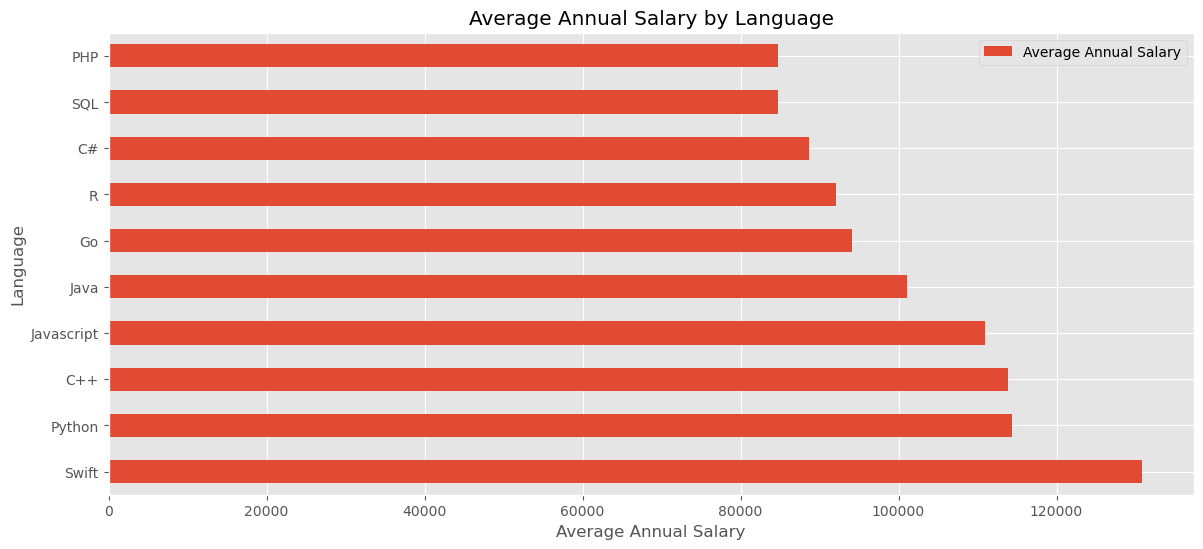

In [59]:
#sort dataframe and store in new dataframe for purpose of plotting
sorted_df = ProgLangSal_df.sort_values(by=['Average Annual Salary'],ascending=False)
# next: plot data
sorted_df.plot(kind='barh', figsize=(14, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Language') # add y-label to the plot
plt.title('Average Annual Salary by Language') # add title to the plot

#print plotted data
plt.show()

In [ ]:

# save as csv:
filename = "popular-languages.csv"
ProgLangSal_df.to_csv(filename)

# now print out the file - optional
ProgLangSal_df = pd.read_csv(filename)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
